In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Ml_Data\Mall_Customers.csv")

In [3]:
data.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 1500x1000 with 0 Axes>

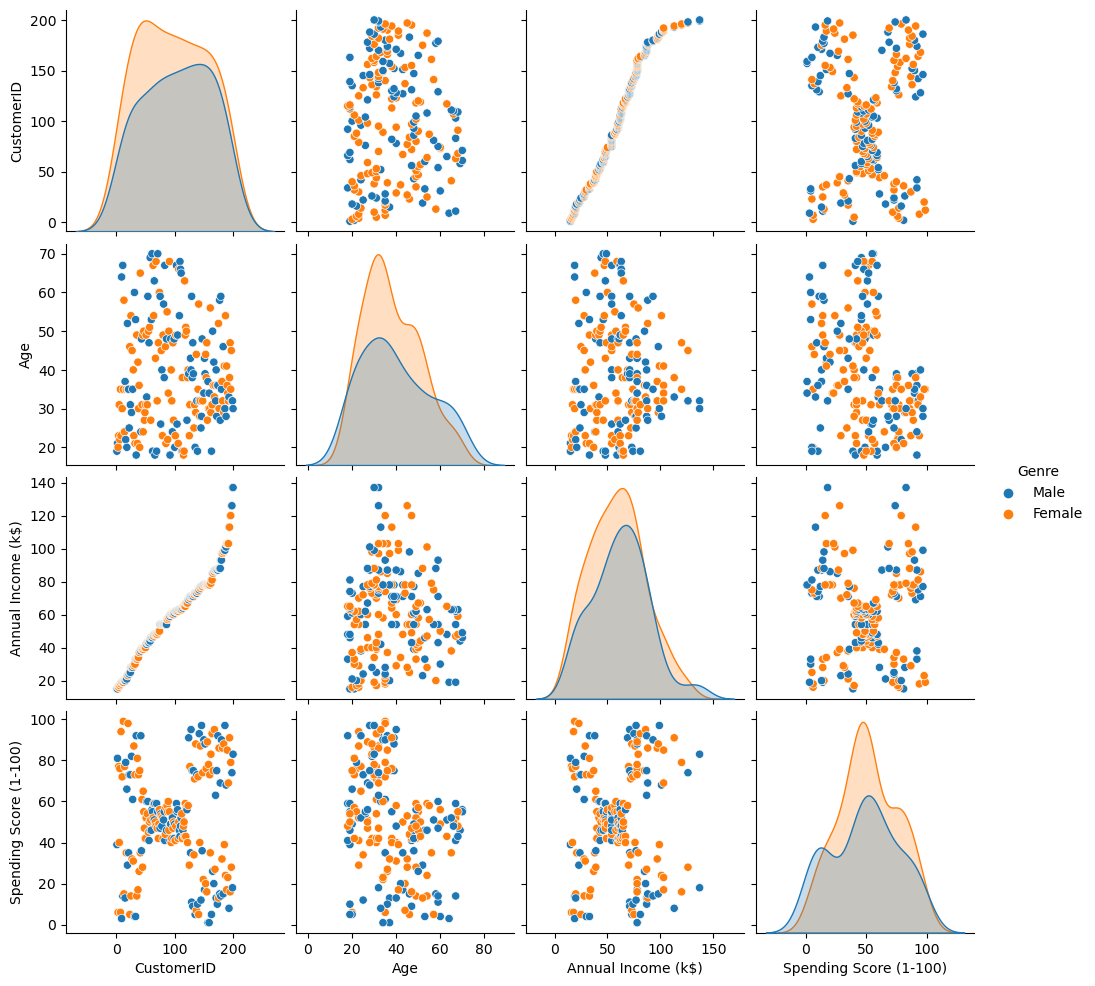

In [7]:
plt.figure(1,figsize=(15,10))
sb.pairplot(data=data,hue="Genre")
plt.show()

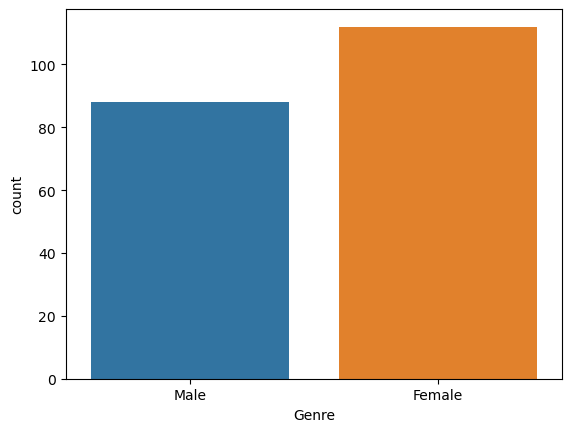

In [8]:
sb.countplot(x="Genre",data=data)
plt.show()

### Encoding male,female

In [9]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
data["Genre"]=data["Genre"].map({'Male':0,'Female':1})

In [11]:
data=data.drop('CustomerID',axis=1)

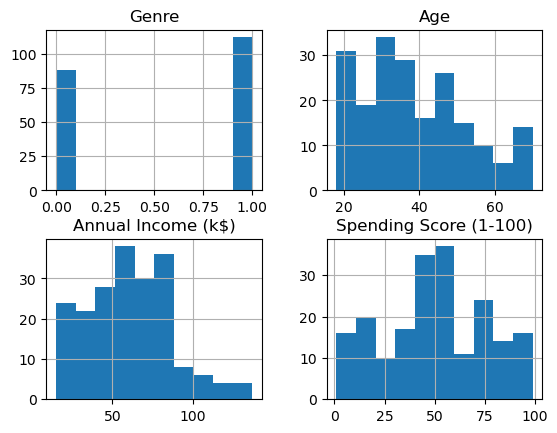

In [12]:
data.hist()
plt.show()

### Clustering

In [13]:
k_cluster_model=KMeans(n_clusters=6)
learner=k_cluster_model.fit(data)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
learner.inertia_

58348.64136331505

In [15]:
data.head(1)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39


In [19]:
learner.cluster_centers_

array([[ 0.42857143, 41.68571429, 88.22857143, 17.28571429],
       [ 0.59090909, 25.27272727, 25.72727273, 79.36363636],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.61904762, 44.14285714, 25.14285714, 19.52380952],
       [ 0.55555556, 56.15555556, 53.37777778, 49.08888889],
       [ 0.65789474, 27.        , 56.65789474, 49.13157895]])

In [20]:
learner.cluster_centers_.shape

(6, 4)

In [21]:
k=int(np.sqrt(len(data)))

In [23]:
k

14

In [24]:
k_rrange=range(1,k+1)

In [26]:
k_rrange

range(1, 15)

In [27]:
n_CLUSTER=list(k_rrange)

In [28]:
n_CLUSTER

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [29]:
learner.cluster_centers_

array([[ 0.42857143, 41.68571429, 88.22857143, 17.28571429],
       [ 0.59090909, 25.27272727, 25.72727273, 79.36363636],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.61904762, 44.14285714, 25.14285714, 19.52380952],
       [ 0.55555556, 56.15555556, 53.37777778, 49.08888889],
       [ 0.65789474, 27.        , 56.65789474, 49.13157895]])

In [31]:
wss=[]
for i in range(len(n_CLUSTER)):
    kval=n_CLUSTER[i]
    #print(kval)
    model_kmean=KMeans(n_clusters=kval)
    learner_model=model_kmean.fit(data)
    error=learner_model.inertia_
    wss.append(error)
    #print(f"k value is {kval} and error is {error}")
    

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [32]:
wss_k=pd.DataFrame({"k_vakue":n_CLUSTER,"wss":wss})

In [33]:
wss_k

,k_vakue,wss
0,1,308862.060000
1,2,212889.442455
2,3,143391.592360
3,4,104414.675342
4,5,75399.615414
5,6,58348.641363
6,7,51167.197368
7,8,44357.621510
8,9,40663.673156
9,10,37729.647425


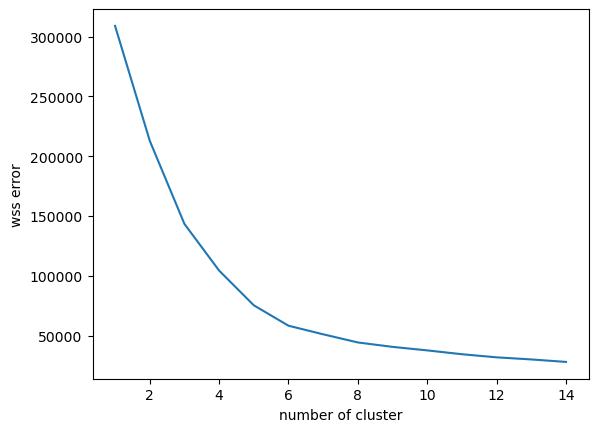

In [34]:
plt.plot(n_CLUSTER,wss)
plt.xlabel("number of cluster")
plt.ylabel("wss error")
plt.show()

In [35]:
learner.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 5,
       3, 1, 4, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5,
       4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5,
       5, 4, 4, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [36]:
data["Cluster"]=learner.labels_

In [37]:
data["Cluster"]=data["Cluster"].map({0:"C1",1:"C2",2:"C3",3:"C4",4:"C5",5:"C6"})

<Figure size 1500x1000 with 0 Axes>

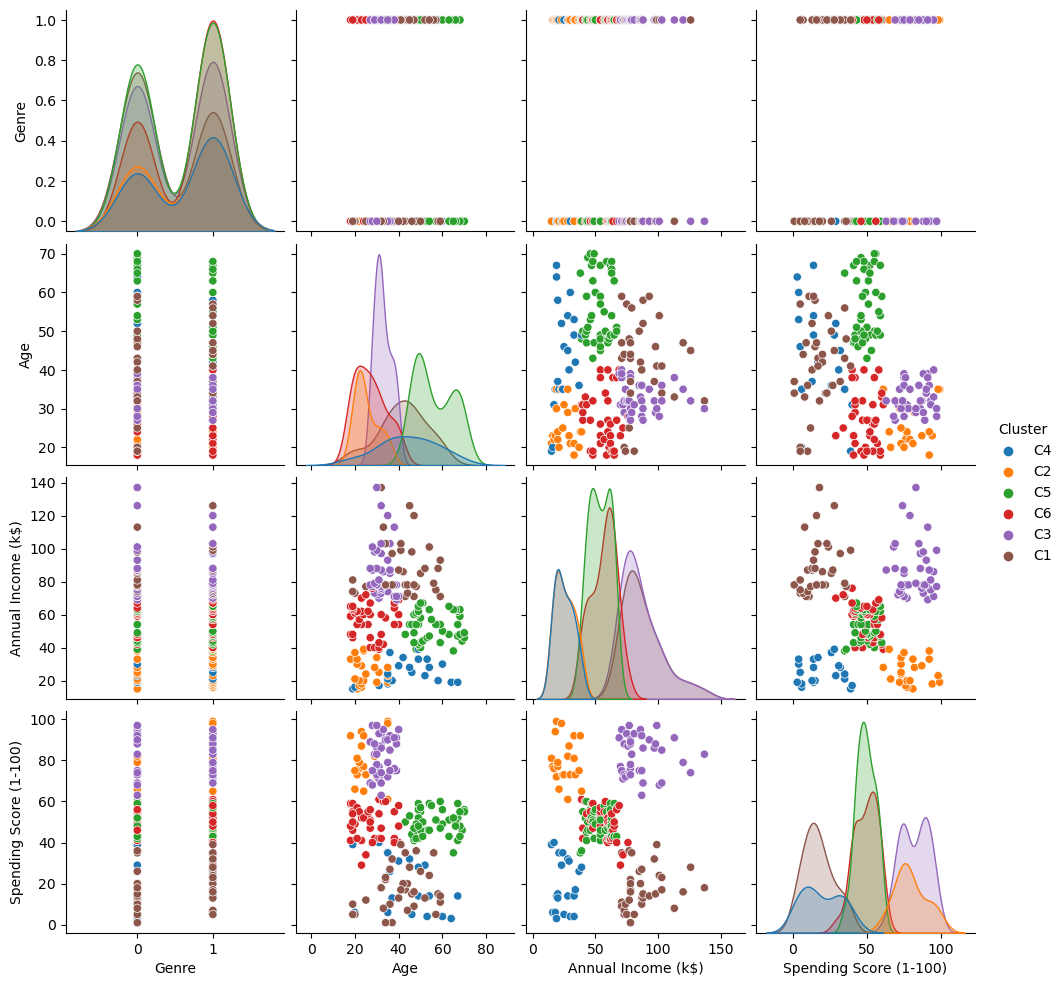

In [38]:
plt.figure(1,figsize=(15,10))
sb.pairplot(data=data,hue="Cluster")
plt.show()